# Table of Contents
[Get the data](#bullet-1)<br>
[Training a Binary Classifier](#bullet-2)

In [4]:
from sklearn.datasets import fetch_mldata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import tarfile

## Get the data <a name='bullet-1'></a>

In [8]:
import scipy.io
mnist = scipy.io.loadmat('./datasets/mnist/mnist-original.mat')

In [9]:
mnist

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Mar 30 03:19:02 2014',
 '__version__': '1.0',
 '__globals__': [],
 'mldata_descr_ordering': array([[array(['label'], dtype='<U5'), array(['data'], dtype='<U4')]],
       dtype=object),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'label': array([[0., 0., 0., ..., 9., 9., 9.]])}

In [15]:
X, y = mnist['data'], mnist['label']
X = X.T
y = y.ravel()
X.shape, y.shape

((70000, 784), (70000,))

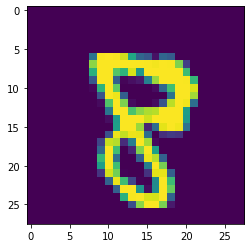

In [24]:
# some digits
some_digit = X[50001].reshape(28, 28)
plt.imshow(some_digit)

In [25]:
y[50001]

8.0

### Partition data

In [114]:
# the mnist data is already partitioned
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [115]:
# now that training set is ordered by number, need to shuffle so that CV folds will be consistent
np.random.seed(0)
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
y_train

array([0., 3., 9., ..., 7., 7., 0.])

## Traning a Binary Classifier <a name='bullet-2'></a>